# stage

In [1]:
%load_ext autoreload
%autoreload 2
%aimport plotnine

import pandas as pd
import numpy as np

from plotnine import (
    ggplot,
    aes,
    after_stat,
    stage,
    geom_bar,
    geom_text,
    geom_bin_2d,
    stat_bin_2d,
)

### stage

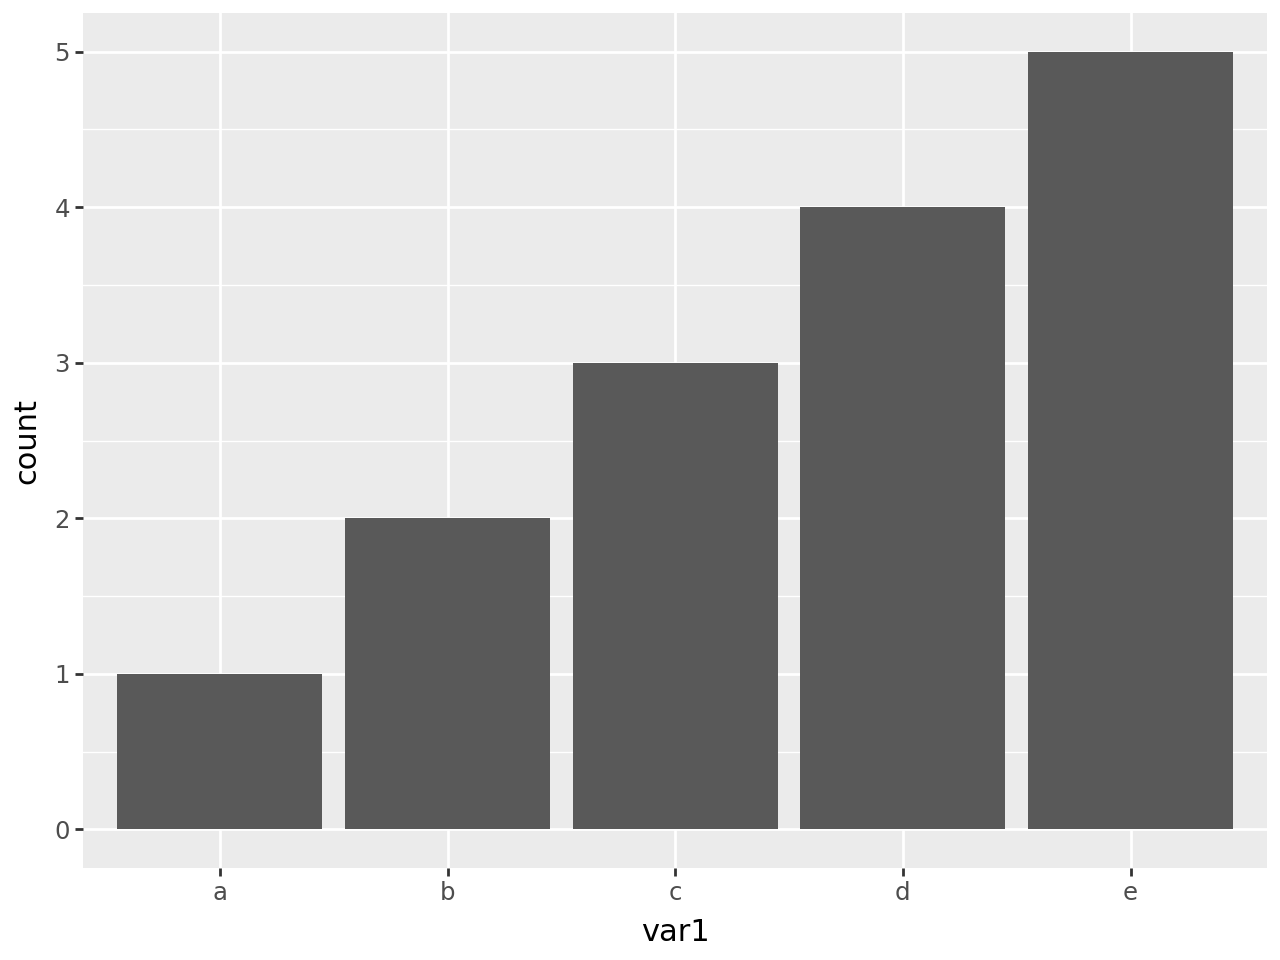

In [2]:
df = pd.DataFrame({
    "var1": list("abbcccddddeeeee"),
    "cat": list("RSRSRSRRRSRSSRS")
})

(
    ggplot(df, aes("var1"))
    + geom_bar()
)

Add the corresponding count on top of each bar.

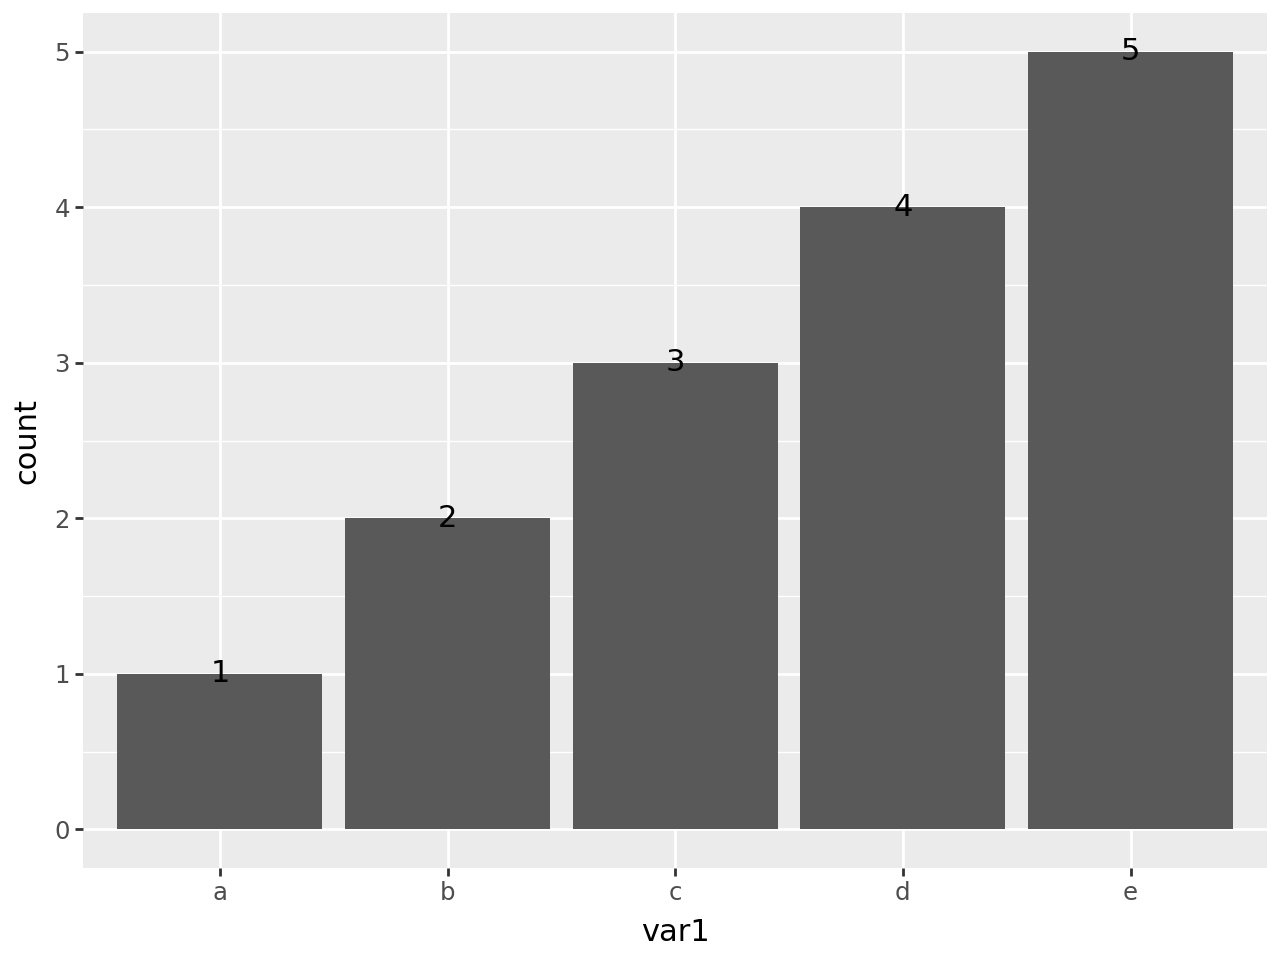

In [3]:
(
    ggplot(df, aes("var1"))
    + geom_bar()
    + geom_text(aes(label=after_stat("count")), stat="count")
)

Adjust the `y` position so that the counts do not overlap the bars.

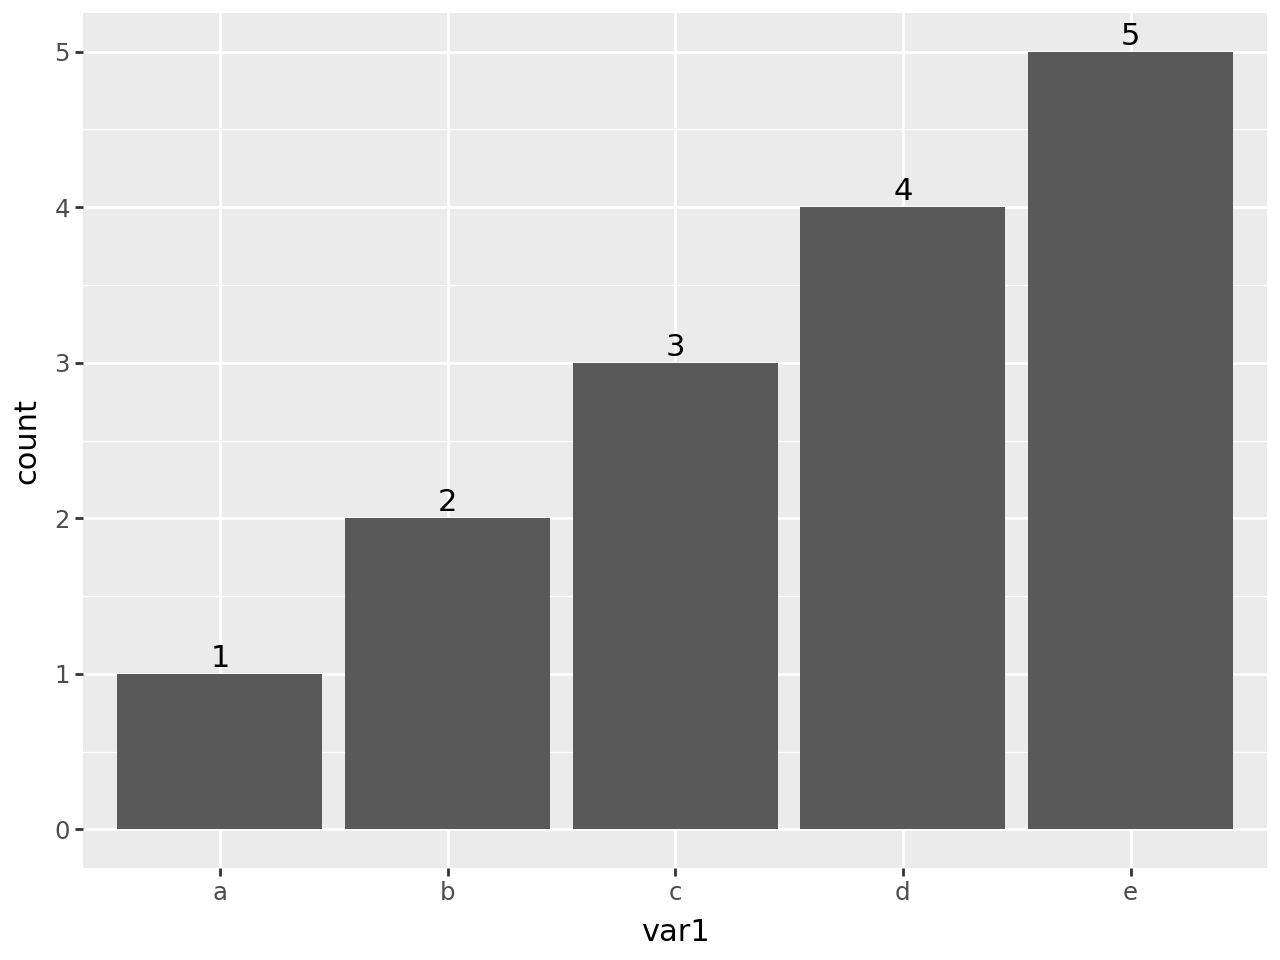

In [4]:
(
    ggplot(df, aes("var1"))
    + geom_bar()
    + geom_text(
        aes(label=after_stat("count"), y=stage(after_stat="count", after_scale="y+.1")),
        stat="count",
    )
)

Note that this will work even nicely for stacked bars where adjustig the
position with `nudge_y=0.1` would not.

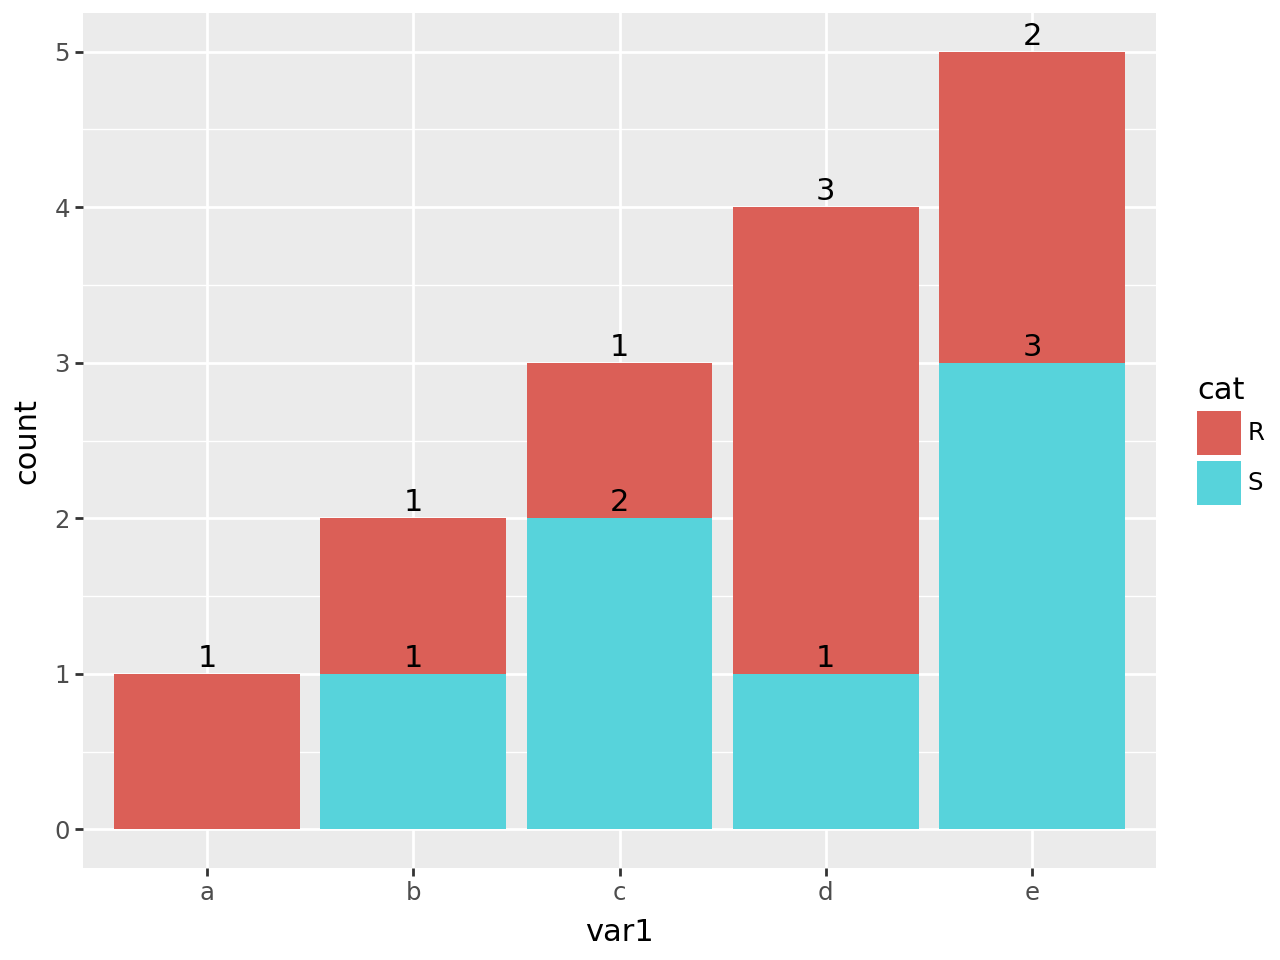

In [5]:
(
    ggplot(df, aes("var1", fill="cat"))
    + geom_bar()
    + geom_text(
        aes(label=after_stat("count"), y=stage(after_stat="count", after_scale="y+.1")),
        stat="count",
        position="stack",
    )
)

## Create a binned 2d plot with counts

In [6]:
np.random.seed(123)
df = pd.DataFrame({
    "col_1": np.random.rand(1000),
    "col_2": np.random.rand(1000)
})

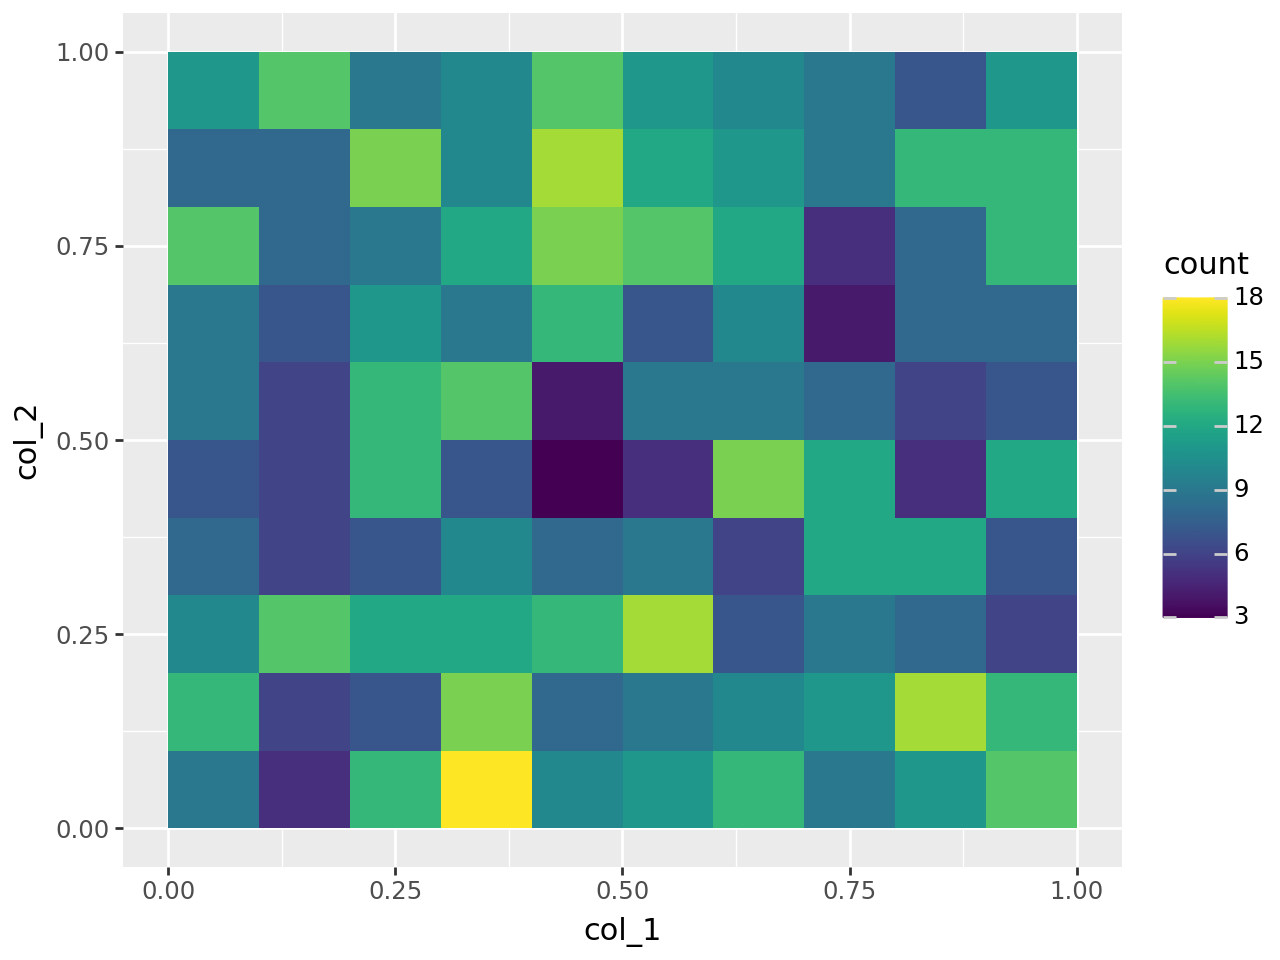

In [7]:
(
    ggplot(df, aes(x="col_1", y="col_2"))
    + geom_bin_2d(position="identity", binwidth=0.1)
)

Add counts to the bins. `stat_bin_2d` bins are specified using
retangular minimum and maximum end-points for dimension; we use these
values to compute the mid-points at which to place the counts.

First `x` and `y` aesthetics are mapped to *col_1* and *col_2*
variables, then after the statistic consumes them and creates `xmin`,
`xmax`, `ymin` & `ymax` values for each bin along with associated
`count`. After the statistic computation the `x` and `y` aesthetics do
not exist, but we create meaningful values using the minimum and maximum
end-points.

Note that the binning parameters for the `geom` and `stat` combination
must be the same. In this case it is the `binwidth`.

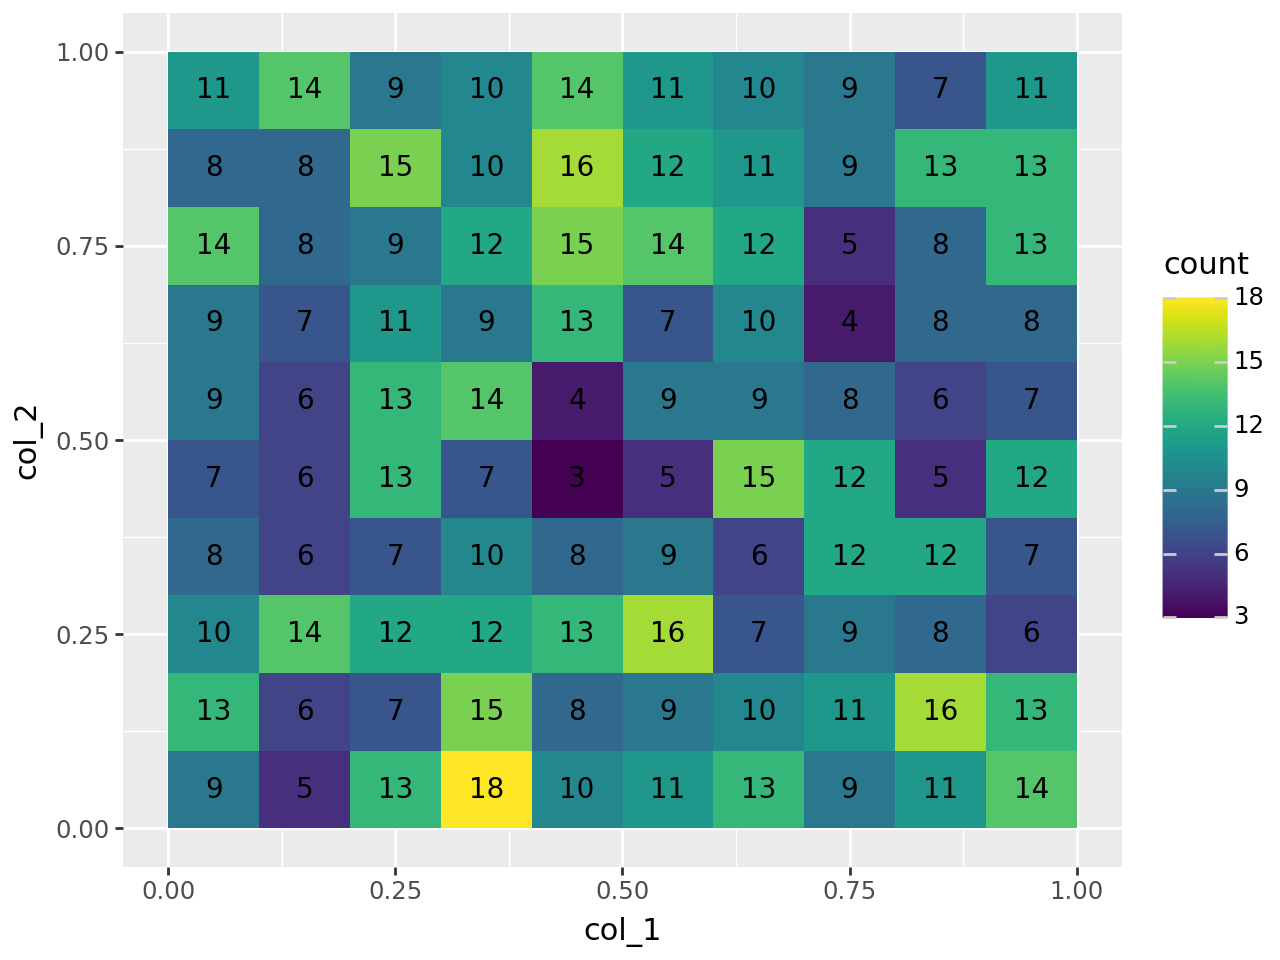

In [8]:
(
    ggplot(df, aes(x="col_1", y="col_2"))
    + geom_bin_2d(position="identity", binwidth=0.1)
    + stat_bin_2d(
        aes(
            x=stage(start="col_1", after_stat="(xmin+xmax)/2"),
            y=stage(start="col_2", after_stat="(ymin+ymax)/2"),
            label=after_stat("count"),
        ),
        binwidth=0.1,
        geom="text",
        format_string="{:.0f}",
        size=10,
    )
)